In [1]:
from bia_bob import bob
bob.__version__

'0.3.0'

In [2]:
%%bob 
load c:/structure/data/blobs.tif,
normalize the image and 
use cellpose to segment the nuclei in this image

In [3]:
import numpy as np
from skimage.io import imread
from skimage.util import img_as_ubyte
from skimage.exposure import rescale_intensity
from cellpose import models

# Load the image
image = imread('c:/structure/data/blobs.tif')

# Normalize the image
image = rescale_intensity(image, out_range=(0, 1))

# Convert image to uint8
image = img_as_ubyte(image)

# Create Cellpose model
model = models.Cellpose(gpu=False)

# Segment nuclei in the image
masks, flows, styles, diams = model.eval(image)

# Show the original image and segmented masks
import stackview
stackview.curtain(image, masks)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 5, 5, 0],
                  [0, 0, 0, ..., 5, 5, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
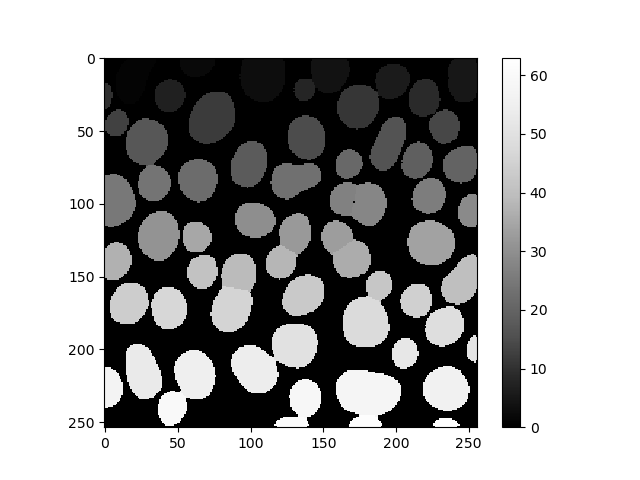
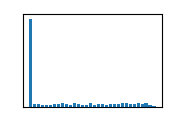

In [4]:
stackview.insight(masks)